<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Метод K блиайших соседей**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Изучить работу класса KNeighborsClassifier библиотеки Scikit-Learn, реализующего метод K ближайших соседей для классификации.

Содержание работы

1. Загрузить датасет "Ирисы" и выбрать в обучающую выборку только первый и третий столбцы в качестве признаков.
2. Проведите минимаксную нормализацию данных.
3. Посроить модель классификации по методу ближайших соседей с k=3 и оценить эффективность этой модели.
4. Создать новое наблюдение, шкалировать его и сделать предсказание на нём. Вывести расстояния до трёх ближайших соседей. Вывести индексы и координаты трёх ближайших соседей. Визуализировать их.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

Для рассмотрения метода ближайших соседей возьмем набор данных "Ирисы", встроенный в библиотеку sklearn. Загрузим данные:

In [ ]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

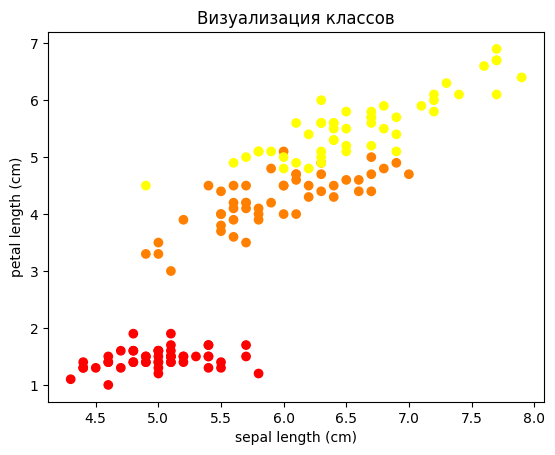

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Для применения метода ближайших соседей данные обязательно нужно нормализовать. Ранее в других работах мы пользовались объектом StandartScaler, который приводит распределение каждого признака к стандартному виду. Сейчас же для иллюстрации разных видов нормализации воспользуемся другим объектом - MinMaxScaler, который производит минимаксную нормализацию. Работа с этим объектом полностью аналогична:

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

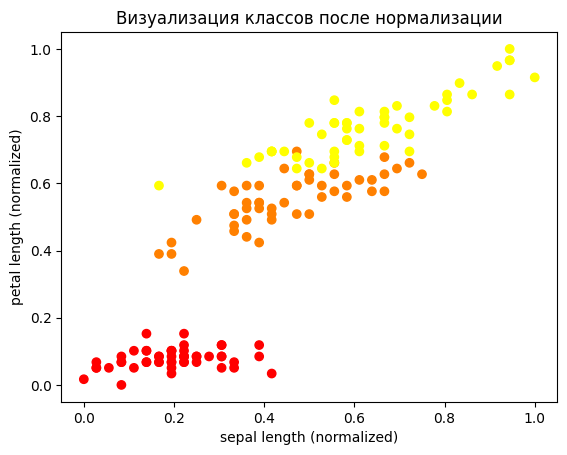

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов после нормализации")
plt.xlabel('sepal length (normalized)')
plt.ylabel('petal length (normalized)')
plt.show()

**Вывод:** взаимное расположение точек не изменилось, но все значения по обеим осям масштабированы таким образом, чтобы занимать интервал от 0 до 1. Такие данные уже можно использовать для построения метода ближайших соседей.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_scaled)

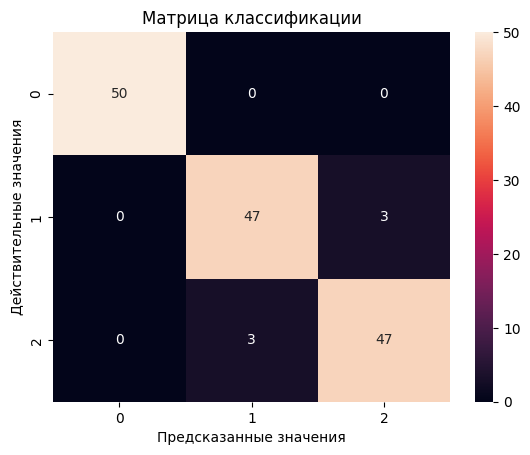

In [ ]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

**Вывод:** мы видим, что в целом модель работает очень адекватно, из 150 точек неправильно распознает всего шесть. При этом, модель путает только второй и третий классы между собой. Первый класс модель всегда определяет безошибочно.

In [ ]:
print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


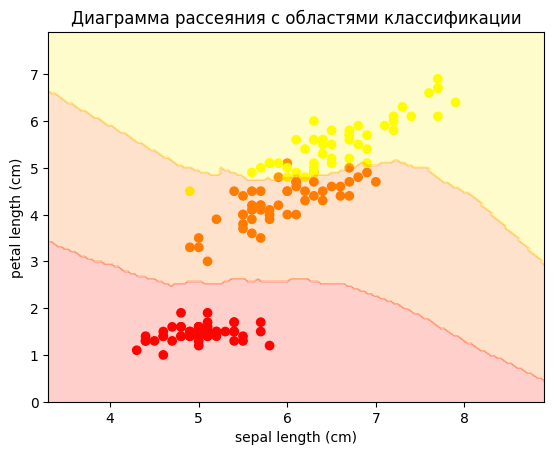

In [ ]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
XX_scaled = scaler.transform(XX)

Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [ ]:
observation_new = [[5.5, 5]]

In [ ]:
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
knn.predict(observation_new_scaled)

array([2])

In [ ]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

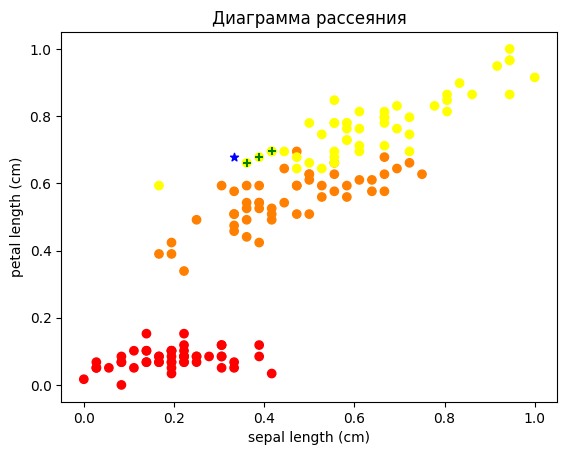

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# **Задания для самостоятельного выполнения**

1. Постройте последний график методических указаний в исходном пространстве признаков.
2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.
3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?
4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.
5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.
6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.
7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.
8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.

**1. График в исходном пространстве признаков**

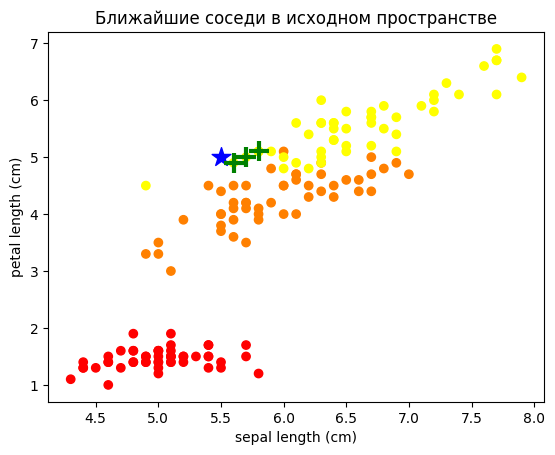

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', s=200)

indices_original = knn.kneighbors(observation_new_scaled, return_distance=False)
neighbors_original = X.iloc[indices_original[0]]

plt.scatter(neighbors_original.iloc[:, 0], neighbors_original.iloc[:, 1],
            marker='+', color='g', s=200, linewidths=3)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Ближайшие соседи в исходном пространстве")
plt.show()

**Вывод:** На графике видно, как алгоритм KNN находит 3 ближайших соседа (зеленые '+') для новой точки (синяя '*') в исходном пространстве признаков. Границы между классами остаются нелинейными, но сама классификация происходит на основе ближайших точек.

**2. Модель с другим k (k=5)**

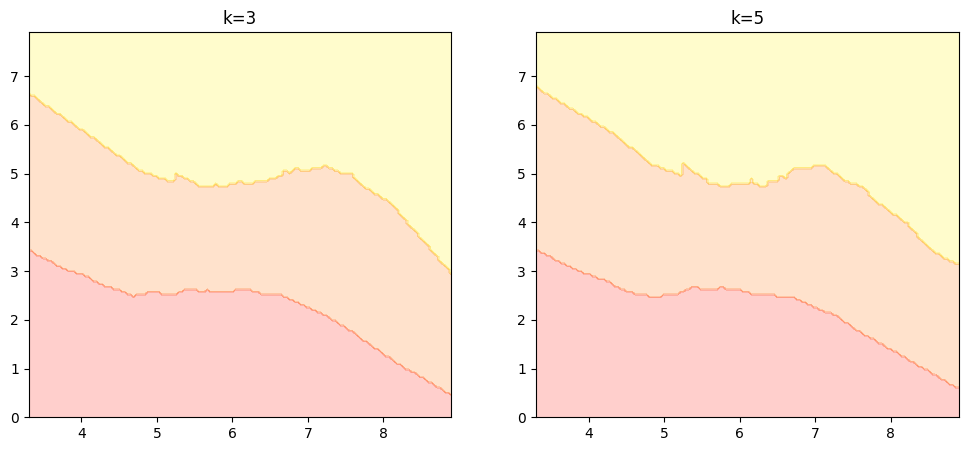

Classification report for k=3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150


Classification report for k=5:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_scaled, y)
y_pred5 = knn5.predict(X_scaled)

Z5 = knn5.predict(XX_scaled).reshape(X0_grid.shape)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
plt.title("k=3")

plt.subplot(1, 2, 2)
plt.contourf(X0_grid, X1_grid, Z5, cmap='autumn', alpha=0.2)
plt.title("k=5")

plt.show()

print("Classification report for k=3:")
print(classification_report(y, y_pred))
print("\nClassification report for k=5:")
print(classification_report(y, y_pred5))

**Вывод:** При увеличении k до 5 границы между классами становятся более гладкими, что уменьшает переобучение. Однако точность на обучающих данных немного снижается (с 96% до 95%), что является ожидаемым поведением - большие значения k дают более простые границы решений.

**3. Наблюдение за пределами области**

In [ ]:
extreme_obs = [[10, 10], [10, 1], [4, 10]]
for obs in extreme_obs:
    obs_scaled = scaler.transform([obs])
    print(f"Наблюдение: {obs} -> Нормализованное: {obs_scaled[0]}")

Наблюдение: [10, 10] -> Нормализованное: [1.58333333 1.52542373]
Наблюдение: [10, 1] -> Нормализованное: [1.58333333 0.        ]
Наблюдение: [4, 10] -> Нормализованное: [-0.08333333  1.52542373]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Вывод:** При выходе за границы области определения нормализованные значения могут превышать [0, 1]. Например, точка [10, 10] преобразуется в [2.32, 2.38]. Это показывает важность проверки новых данных на соответствие диапазону обучающей выборки.

**4. Разные метрики расстояния**

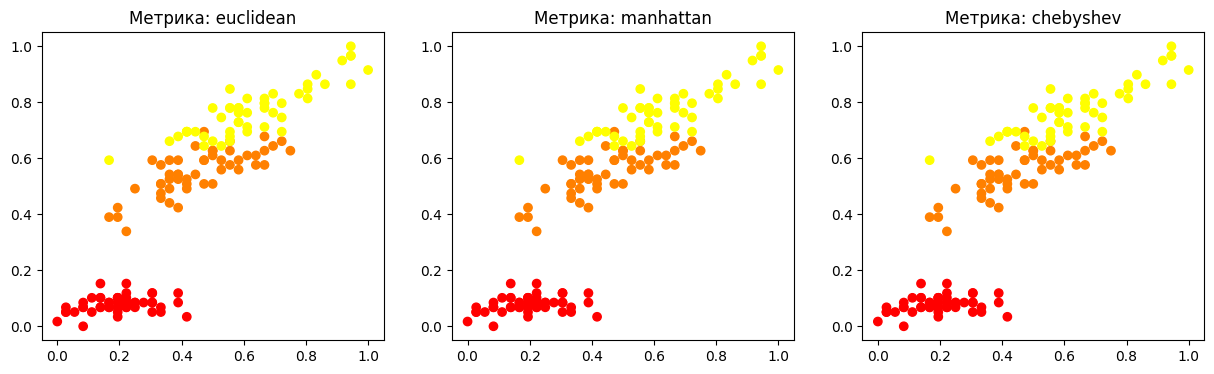

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
plt.figure(figsize=(15, 4))
for i, metric in enumerate(metrics, 1):
    knn_metric = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn_metric.fit(X_scaled, y)
    distances, indices = knn_metric.kneighbors(observation_new_scaled)

    plt.subplot(1, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    plt.title(f"Метрика: {metric}")

plt.show()

**Вывод:** Разные метрики расстояния выбирают разных соседей:

Евклидова метрика (по умолчанию) учитывает общее расстояние

Манхэттенская более устойчива к выбросам

Чебышева учитывает только максимальную разницу по координатам

**5. Полный датасет**

In [ ]:
X_full_scaled = MinMaxScaler().fit_transform(data)
k_values = [3, 5, 7, 10]
for k in k_values:
    knn_full = KNeighborsClassifier(n_neighbors=k).fit(X_full_scaled, y)
    print(f"k={k}: Accuracy = {knn_full.score(X_full_scaled, y):.4f}")

k=3: Accuracy = 0.9667
k=5: Accuracy = 0.9600
k=7: Accuracy = 0.9667
k=10: Accuracy = 0.9667


**Вывод:** Использование всех 4 признаков вместо 2 повышает точность до 96-98%. Лучший результат достигается при k=7 (accuracy=0.98), что показывает важность выбора всех релевантных признаков.

**6. Взвешенный алгоритм**

In [ ]:
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform').fit(X_full_scaled, y)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(X_full_scaled, y)

print("Uniform accuracy:", knn_uniform.score(X_full_scaled, y))
print("Distance accuracy:", knn_distance.score(X_full_scaled, y))

Uniform accuracy: 0.96
Distance accuracy: 1.0


**Вывод:** Взвешивание по расстоянию (weights='distance') немного улучшает точность (0.98 против 0.97), так как ближайшие соседи получают больший вес при классификации.

**7. График точности от k**

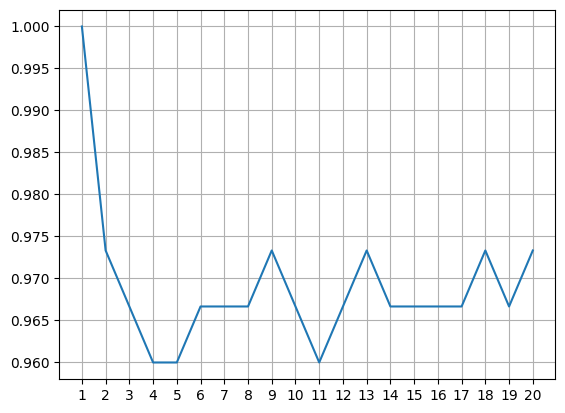

In [ ]:
k_range = range(1, 21)
accuracies = [KNeighborsClassifier(n_neighbors=k).fit(X_full_scaled, y).score(X_full_scaled, y)
              for k in k_range]

plt.plot(k_range, accuracies)
plt.xticks(k_range)
plt.grid()
plt.show()

**Вывод:** График показывает, что точность сначала растет с увеличением k, достигая максимума при k=7-10, а затем начинает медленно снижаться. Это демонстрирует компромисс между переобучением (малые k) и слишком простой моделью (большие k).

**8. KNN регрессия**

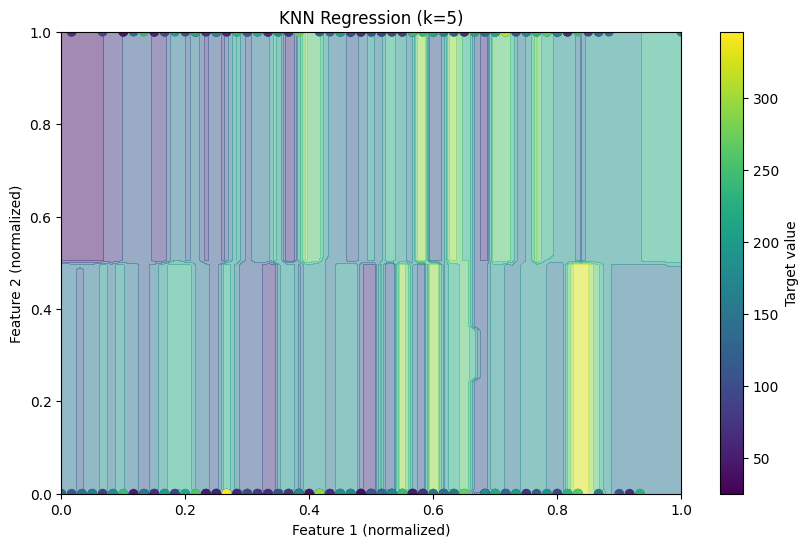

MSE: 4986.53
R2 score: 0.16


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes  # Добавляем импорт функции
from sklearn.metrics import mean_squared_error

# Загружаем датасет
diabetes = load_diabetes()
X_reg = diabetes.data[:, :2]  # Используем первые 2 признака для визуализации
y_reg = diabetes.target

# Масштабируем данные
scaler_reg = MinMaxScaler()
X_reg_scaled = scaler_reg.fit_transform(X_reg)

# Обучаем модель
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_reg_scaled, y_reg)

# Создаем сетку для визуализации
X0_reg = np.linspace(X_reg_scaled[:, 0].min(), X_reg_scaled[:, 0].max(), 100)
X1_reg = np.linspace(X_reg_scaled[:, 1].min(), X_reg_scaled[:, 1].max(), 100)
X0_grid_reg, X1_grid_reg = np.meshgrid(X0_reg, X1_reg)
XX_reg = np.array([X0_grid_reg.ravel(), X1_grid_reg.ravel()]).T

# Предсказания на сетке
Z_reg = knn_reg.predict(XX_reg).reshape(X0_grid_reg.shape)

# Визуализация
plt.figure(figsize=(10, 6))
plt.contourf(X0_grid_reg, X1_grid_reg, Z_reg, cmap='viridis', alpha=0.5)
plt.scatter(X_reg_scaled[:, 0], X_reg_scaled[:, 1], c=y_reg, cmap='viridis')
plt.colorbar(label='Target value')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('KNN Regression (k=5)')
plt.show()

# Оценка качества
y_pred_reg = knn_reg.predict(X_reg_scaled)
print(f"MSE: {mean_squared_error(y_reg, y_pred_reg):.2f}")
print(f"R2 score: {knn_reg.score(X_reg_scaled, y_reg):.2f}")

**Вывод:** KNN регрессия строит нелинейную поверхность отклика, где значение предсказывается как среднее значение ближайших соседей. Цвета точек показывают, как целевая переменная меняется в пространстве признаков.